In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import graphviz
import pydotplus
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import tree

# For reproducible results
RANDOM_STATE_SEED = 420

In [4]:
FRIDAY_FILE = 'friday_data.csv'
ALL_FILE = 'processed_data.csv'
ALL_SAVED_FILE = 'all-decision-tree-classifier.pkl'

In [37]:
df_dataset = pd.read_csv(ALL_FILE)

In [38]:
df_dataset.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,94658,6,7,708.0,3718.0,387.0,0.0,118.0,159.284651,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,206,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,165505,3,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,102429,6,7,708.0,3718.0,387.0,0.0,118.0,159.284651,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,167,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [39]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861881 entries, 0 to 10861880
Data columns (total 73 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    float64
 4   TotLen Bwd Pkts    float64
 5   Fwd Pkt Len Max    float64
 6   Fwd Pkt Len Min    float64
 7   Fwd Pkt Len Mean   float64
 8   Fwd Pkt Len Std    float64
 9   Bwd Pkt Len Max    float64
 10  Bwd Pkt Len Min    float64
 11  Bwd Pkt Len Mean   float64
 12  Bwd Pkt Len Std    float64
 13  Flow IAT Mean      float64
 14  Flow IAT Std       float64
 15  Flow IAT Max       float64
 16  Flow IAT Min       float64
 17  Fwd IAT Tot        float64
 18  Fwd IAT Mean       float64
 19  Fwd IAT Std        float64
 20  Fwd IAT Max        float64
 21  Fwd IAT Min        float64
 22  Bwd IAT Tot        float64
 23  Bwd IAT Mean       float64
 24  Bwd IAT Std        float64
 25  Bwd IAT Max     

In [40]:
train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [41]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 9532881
Malicious: 1329000
---------------
Training set:

Benign: 6672969
Malicious: 930347
---------------
Test set:

Benign: 2859912
Malicious: 398653


In [42]:
# last 3 columns don't need to be edited
numerical_cols = df_dataset.columns[:-3]
min_max_scaler = MinMaxScaler().fit(train[numerical_cols])
train[numerical_cols] = min_max_scaler.transform(train[numerical_cols])
test[numerical_cols] = min_max_scaler.transform(test[numerical_cols])

In [43]:
y_train = np.array(train.pop("Label")) # pop removes "Label" from the dataframe
X_train = train.values

y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

In [44]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

hyperparameters = {
    'max_depth': [i for i in range(1, 20)]
}

In [45]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [46]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


In [ ]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9996658065335401
---------------
Best performing hyperparameters on Validation set: 
{'max_depth': 16}
---------------
DecisionTreeClassifier(max_depth=16)


In [ ]:
model = clf.best_estimator_

In [ ]:
predictions = model.predict(X_test)

0.9996701501045031


/Users/kuhegbu/Classes/CS356/CS356Project/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


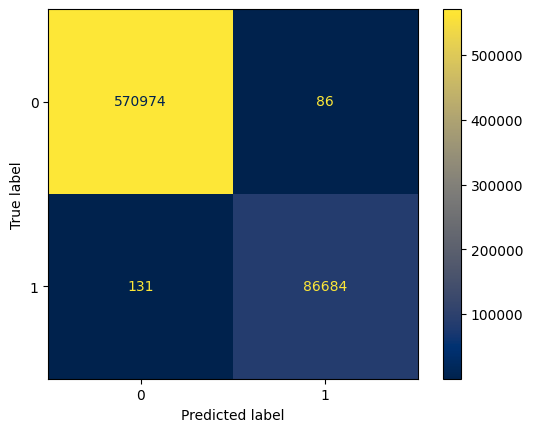

In [ ]:
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")

In [ ]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99977   0.99985   0.99981    571060
           1    0.99901   0.99849   0.99875     86815

    accuracy                        0.99967    657875
   macro avg    0.99939   0.99917   0.99928    657875
weighted avg    0.99967   0.99967   0.99967    657875



In [ ]:
joblib.dump(model, f"trained_models/{ALL_SAVED_FILE}")

['trained_models/friday-decision-tree-classifier.pkl']